# Xarray.  Введение. Концептуальное сходство pandas и xarray.

## Xarray - разработка комьюнити [pydata](https://pydata.org), нацеленная на обработку многомерных данных с несколькими привязками

Работает с netcdf главным образом через низкоуровневую библиотеку netCDF4, но этим не ограничевается

Работаем с массивом аномалий температуры Гадлей центра (netcdf файл). Скачать можно [здесь](https://mega.nz/#!C0tDSKwJ!kWaLb9qzYT5MpFqayG_VGiJhcWfSZ_FcFa55DCvaSx4)

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ncdump -h /mnt/WORK2/Data/HadCRUT4/HadCRUT.4.6.0.0.median.nc

netcdf HadCRUT.4.6.0.0.median {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	field_status_string_length = 1 ;
	time = UNLIMITED ; // (2027 currently)
variables:
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:point_spacing = "even" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "gregorian" ;
		time:start_year = 1850s ;
		time:end_year = 2018s ;
		time:start_month = 1s ;
		time:end_month = 11s ;
		time:axis = "T" ;
	float temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = "near_surface_temperature_anomaly" ;
		temperature_

In [3]:
data = xr.open_dataset('/mnt/WORK2/Data/HadCRUT4/HadCRUT.4.6.0.0.median.nc')

In [5]:
data.info()

xarray.Dataset {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	time = 2027 ;

variables:
	float32 latitude(latitude) ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:point_spacing = even ;
		latitude:units = degrees_north ;
		latitude:axis = Y ;
	float32 longitude(longitude) ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
		longitude:point_spacing = even ;
		longitude:units = degrees_east ;
		longitude:axis = X ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:start_year = 1850 ;
		time:end_year = 2018 ;
		time:start_month = 1 ;
		time:end_month = 11 ;
		time:axis = T ;
	float32 temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = near_surface_temperature_anomaly ;
		temperature_anomaly:units = K ;
		temperature_anomaly:reference_period = [1961 1990] ;
	|S1 field_status(time) ;
		field_status:long_name = field_status ;

// global attributes:
	:ti

In [9]:
data

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2027)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 19/12/2018 16:42:18
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0

In [10]:
plt.rcParams.update({'figure.dpi':150,'savefig.dpi':150,'savefig.bbox':'tight'})

In [11]:
plt.style.use('ggplot')

## Арифметика и визуализация данных

Индекс это индекс даты/времени. Это очень важно!

Понятие индексов!

In [8]:
data.indexes

latitude: Float64Index([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5,
                        -42.5, -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,
                          2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
                         47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5],
                       dtype='float64', name='latitude')
longitude: Float64Index([-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5,
                         -137.5, -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5,
                          -97.5,  -92.5,  -87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,
                          -57.5,  -52.5,  -47.5,  -42.5,  -37.5,  -32.5,  -27.5,  -22.5,
                          -17.5,  -12.5,   -7.5,   -2.5,    2.5,    7.5,   12.5,   17.5,
                           22.5,   27.5,   32.5,   37.5,   42.5,   47.5,   52.5,   57.5,
                           62.5,   67.5,   72.5,   77.5,   8

In [12]:
data['temperature_anomaly']

<xarray.DataArray 'temperature_anomaly' (time: 2027, latitude: 36, longitude: 72)>
[5253984 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Для формирования сечений тоже можно использовать индексы. Например,

In [15]:
data['temperature_anomaly'][0]

<xarray.DataArray 'temperature_anomaly' (latitude: 36, longitude: 72)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    time       datetime64[ns] 1850-01-16T12:00:00
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Более правильная индексация (применима и к DataSet тоже)

In [18]:
data['temperature_anomaly'].isel(longitude=10)

<xarray.DataArray 'temperature_anomaly' (time: 2027, latitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -127.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

In [19]:
data['temperature_anomaly'].isel(longitude=20,time=500)

<xarray.DataArray 'temperature_anomaly' (latitude: 36)>
array([      nan,       nan,       nan,       nan,       nan,       nan,
        0.108813, -0.047952,  0.007201, -0.842816, -0.070317, -0.579523,
       -0.944073, -0.360339,       nan,       nan,       nan, -0.267767,
             nan,       nan,       nan,  0.596271, -0.478932, -0.256182,
       -0.139295, -0.014693,  1.946358,  2.067549,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -77.5
    time       datetime64[ns] 1891-09-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Здесь мы оперируем непостредственно индексами - целыми числами.

Для выбора диапазона удобно использовать функцию slice()

In [20]:
data['temperature_anomaly'].isel(longitude=20,time=slice(10,50))

<xarray.DataArray 'temperature_anomaly' (time: 40, latitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -77.5
  * time       (time) datetime64[ns] 1850-11-16 ... 1854-02-15
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Xarray также использует matplotlib в качестве библиотеки визуализации. Сравните с предыдущим уроком.

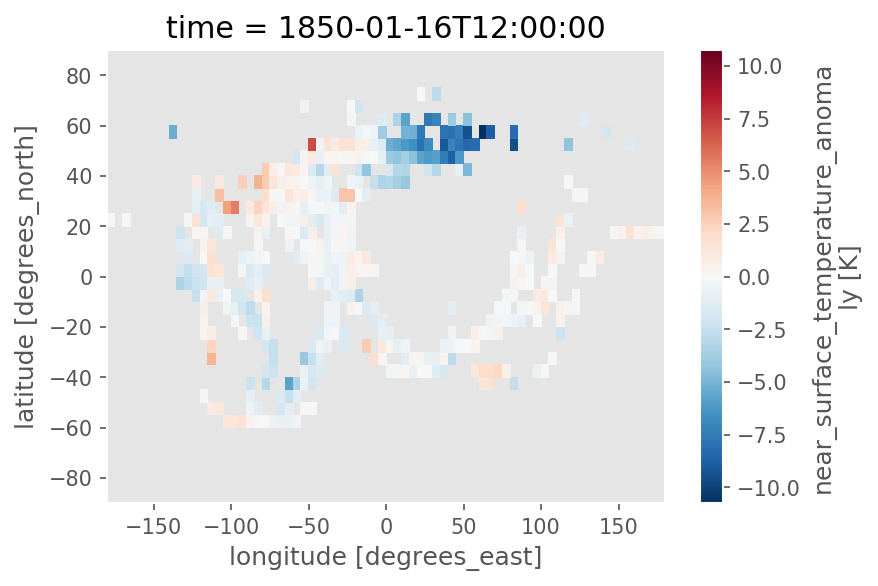

In [21]:
data['temperature_anomaly'][0].plot()

Фиксирование времени даёт 2-мерное сечение. Зафиксируем широту и долготу:

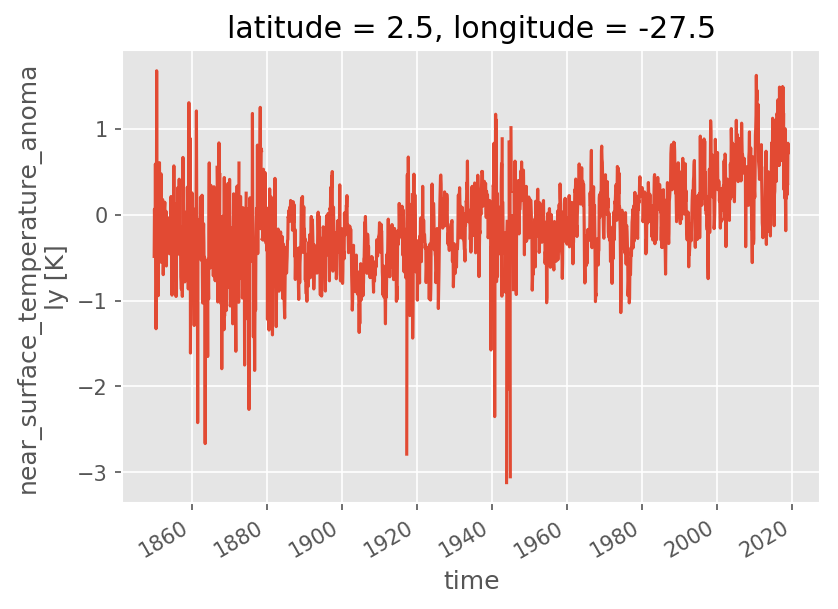

In [22]:
data['temperature_anomaly'].isel(longitude=30,latitude=18).plot()

Основная фича: формирование более естественных сечений. Например, нужен район от -10 до 10 в.д., от 0 до 90 с.ш., в 1958 году

In [24]:
sel = data['temperature_anomaly'].sel(latitude=slice(0.,90.),longitude=slice(-10,10),time='1958')

In [25]:
sel.longitude.values

array([-7.5, -2.5,  2.5,  7.5], dtype=float32)

In [26]:
sel.latitude.values

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5], dtype=float32)

In [27]:
sel.time.values

array(['1958-01-16T12:00:00.000000000', '1958-02-15T00:00:00.000000000',
       '1958-03-16T12:00:00.000000000', '1958-04-16T00:00:00.000000000',
       '1958-05-16T12:00:00.000000000', '1958-06-16T00:00:00.000000000',
       '1958-07-16T12:00:00.000000000', '1958-08-16T12:00:00.000000000',
       '1958-09-16T00:00:00.000000000', '1958-10-16T12:00:00.000000000',
       '1958-11-16T00:00:00.000000000', '1958-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')